In [ ]:
!pip install pandas matplotlib

In [38]:
import pandas as pd
df = pd.read_csv('max_speed.csv')

In [39]:
import pandas as pd

# Convert the time column from Unix epoch to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Calculate the relative seconds since start
df['relative_seconds'] = (df['time'] - df['time'].min()).dt.total_seconds()

# Display the updated dataframe
df


,time,distance,delta_distance,delta_time,velocity,relative_seconds
0,2024-02-01 14:37:48.491903232,3.819,-0.235,0.200773,-1.170478,0.000000
1,2024-02-01 14:37:48.692545280,3.701,-0.118,0.198604,-0.594146,0.200642
2,2024-02-01 14:37:48.893227520,3.557,-0.144,0.198648,-0.724901,0.401324
3,2024-02-01 14:37:49.093640192,3.384,-0.173,0.198505,-0.871515,0.601737
4,2024-02-01 14:37:49.294152960,3.216,-0.168,0.198671,-0.845621,0.802250
...,...,...,...,...,...,...
211,2024-02-01 14:38:44.473665792,3.452,0.156,0.198928,0.784202,55.981763
212,2024-02-01 14:38:44.674136064,3.620,0.168,0.198707,0.845467,56.182233
213,2024-02-01 14:38:44.874795776,3.820,0.200,0.198921,1.005425,56.382893
214,2024-02-01 14:38:45.075441664,4.013,0.193,0.198925,0.970213,56.583538


<Axes: xlabel='relative_seconds'>

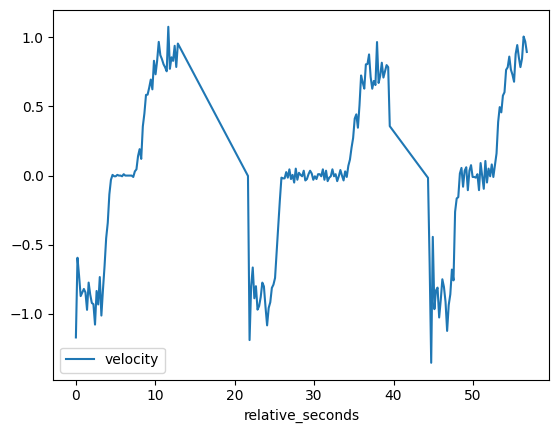

In [40]:
df.plot(x='relative_seconds', y='velocity')

In [53]:
# Multiply velocity by -1 since the sensor is measuring distance directly in front
df['velocity'] = df['velocity'] * -1

In [54]:
min_velocity = df['velocity'].min()
max_velocity = df['velocity'].max()
avg_velocity = df['velocity'].mean()

min_velocity, max_velocity, avg_velocity


(-1.0759420685951562, 1.3536882241501564, -0.00103077368151272)

<Axes: xlabel='relative_seconds'>

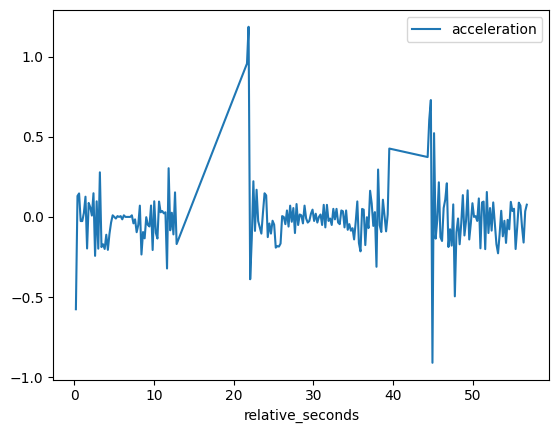

In [55]:
# Calculate the accelerations
df['acceleration'] = df['velocity'].diff()

# Create a new dataframe with only the time and acceleration columns
acceleration_df = df[['relative_seconds', 'acceleration']]

# Plot the acceleration dataframe
acceleration_df.plot(x='relative_seconds', y='acceleration')


In [43]:
import pandas as pd
# ros2 topic echo --csv /diff_drive_controller/cmd_vel_unstamped
# Read the CSV file
df2 = pd.read_csv('max_speed_cmd_vel.csv')

# Display the dataframe
df2


,lin_x,lin_y,lin_z,ang_x,ang_y,ang_z
0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
696,-0.26,0.0,0.0,0.0,0.0,0.0
697,-0.26,0.0,0.0,0.0,0.0,0.0
698,-0.26,0.0,0.0,0.0,0.0,0.0
699,-0.26,0.0,0.0,0.0,0.0,0.0


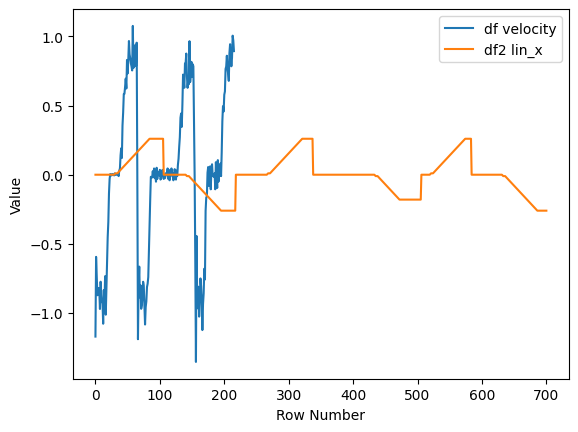

In [44]:
# plot df velocity and df2 lin_x on top of each other. just use the row number as the x axis
import matplotlib.pyplot as plt

# Plot the velocity column from df
plt.plot(df.index, df['velocity'], label='df velocity')

# Plot the lin_x column from df2
plt.plot(df2.index, df2['lin_x'], label='df2 lin_x')

# Add labels and legend
plt.xlabel('Row Number')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [56]:
# Find the maximum and minimum values of df velocity and df2 lin_x
max_df_velocity = df['velocity'].max()
min_df_velocity = df['velocity'].min()
max_df2_lin_x = df2['lin_x'].max()
min_df2_lin_x = df2['lin_x'].min()

# Filter df based on the maximum and minimum values of df velocity
df_filtered = df[(df['velocity'] >= min_df_velocity) & (df['velocity'] <= max_df_velocity)]

# Filter df2 based on the maximum and minimum values of df2 lin_x
df2_filtered = df2[(df2['lin_x'] >= min_df2_lin_x) & (df2['lin_x'] <= max_df2_lin_x)]

# Display the filtered dataframes
df_filtered, df2_filtered


(                             time  distance  delta_distance  delta_time  \
 0   2024-02-01 14:37:48.491903232     3.819          -0.235    0.200773   
 1   2024-02-01 14:37:48.692545280     3.701          -0.118    0.198604   
 2   2024-02-01 14:37:48.893227520     3.557          -0.144    0.198648   
 3   2024-02-01 14:37:49.093640192     3.384          -0.173    0.198505   
 4   2024-02-01 14:37:49.294152960     3.216          -0.168    0.198671   
 ..                            ...       ...             ...         ...   
 211 2024-02-01 14:38:44.473665792     3.452           0.156    0.198928   
 212 2024-02-01 14:38:44.674136064     3.620           0.168    0.198707   
 213 2024-02-01 14:38:44.874795776     3.820           0.200    0.198921   
 214 2024-02-01 14:38:45.075441664     4.013           0.193    0.198925   
 215 2024-02-01 14:38:45.276285952     4.191           0.178    0.199138   
 
      velocity  relative_seconds  acceleration  
 0    1.170478          0.000000     

In [58]:
df2_stretched = df2.reindex(df.index)

# Display the stretched dataframe
df2_stretched


,lin_x,lin_y,lin_z,ang_x,ang_y,ang_z
0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
211,-0.26,0.0,0.0,0.0,0.0,0.0
212,-0.26,0.0,0.0,0.0,0.0,0.0
213,-0.26,0.0,0.0,0.0,0.0,0.0
214,-0.26,0.0,0.0,0.0,0.0,0.0


In [66]:
!pip install scipy numpy

     |█████▋                          | 5.4 MB 47 kB/s eta 0:09:038

In [ ]:
from scipy.signal import argrelextrema

# Find the peaks in df['velocity']
peaks_df = argrelextrema(df['velocity'].values, comparator=np.greater)[0]

# Find the valleys in df['velocity']
valleys_df = argrelextrema(df['velocity'].values, comparator=np.less)[0]

# Find the peaks in df2_stretched['lin_x']
peaks_df2 = argrelextrema(df2_stretched['lin_x'].values, comparator=np.greater)[0]

# Find the valleys in df2_stretched['lin_x']
valleys_df2 = argrelextrema(df2_stretched['lin_x'].values, comparator=np.less)[0]

# Display the indices of the peaks and valleys
peaks_df, valleys_df, peaks_df2, valleys_df2
